Data Dictionary:

Variable Name	Description
Carat	 Carat weight of the cubic zirconia.
Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color 	 Colour of the cubic zirconia.With D being the best and J the worst.
Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price	 the Price of the cubic zirconia.
X	 Length of the cubic zirconia in mm.
Y	 Width of the cubic zirconia in mm.
Z	 Height of the cubic zirconia in mm.

In [114]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import sklearn.metrics as metrics

In [2]:
# read csv file and check top 10 records
gem_df= pd.read_csv('cubic_zirconia.csv')
gem_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [3]:
# Check shape of the data 
gem_df.shape

(26967, 11)

In [4]:
# Get info on dataset
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
#check for data types
gem_df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [43]:
# missing values
gem_df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
# check summary of the dataset
gem_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [8]:
## Unique values of categorical variables
for column in gem_df.columns:
    if gem_df[column].dtype == 'object':
        print(column.upper(),': ',gem_df[column].nunique())
        print(gem_df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [10]:
#check for duplicates
dups = gem_df.duplicated()
print('Number of duplicated rows= %d' %(dups.sum()))

Number of duplicated rows= 0


In [12]:
df = gem_df.drop(['Unnamed: 0'],axis=1)
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


Observations:
1.The dataset consists of 26967 rows and 11 columns
2.There are 6 floats, 2 integer abd 3 objects present in dataset
3. Missing values in depth column (697)
4. Columns unnamed in dropped from dataset as there is no use 
5. the min values for x,y and z is O can be default

In [13]:
#check for duplicates
dups = df.duplicated()
print('Number of duplicated rows= %d' %(dups.sum()))

Number of duplicated rows= 34


In [14]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


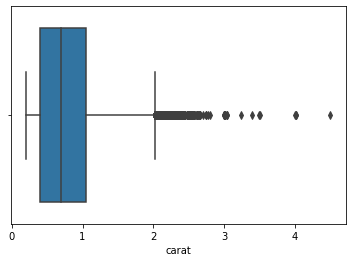

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


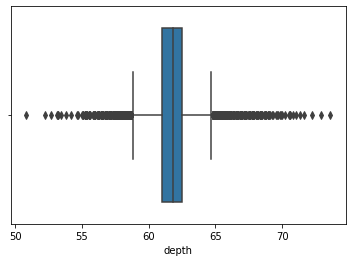

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


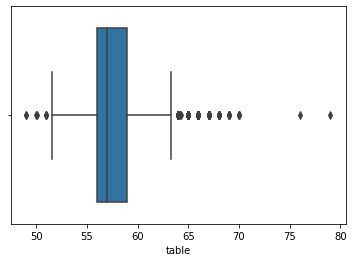

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


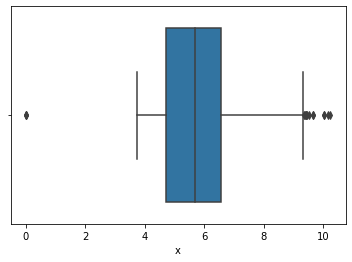

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


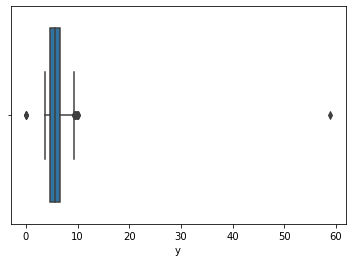

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


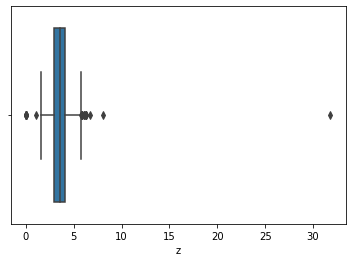

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


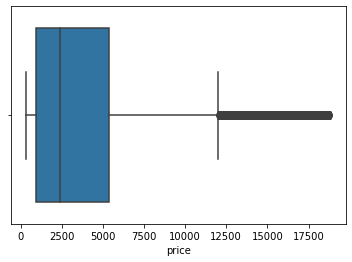

In [15]:
cols = ['carat', 'depth', 'table', 'x', 'y', 'z',
       'price']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show()

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [20]:
lrcarat,urcarat=remove_outlier(df['carat'])
df['carat']=np.where(df['carat']>urcarat,urcarat,df['carat'])
df['carat']=np.where(df['carat']<lrcarat,lrcarat,df['carat'])

lrdepth,urdepth=remove_outlier(df['depth'])
df['depth']=np.where(df['depth']>urdepth,urdepth,df['depth'])
df['depth']=np.where(df['depth']<lrdepth,lrdepth,df['depth'])

lrtable,urtable=remove_outlier(df['table'])
df['table']=np.where(df['table']>urtable,urtable,df['table'])
df['table']=np.where(df['table']<lrtable,lrtable,df['table'])

lrx,urx=remove_outlier(df['x'])
df['x']=np.where(df['x']>urx,urx,df['x'])
df['x']=np.where(df['x']<lrx,lrx,df['x'])


lry,ury=remove_outlier(df['y'])
df['y']=np.where(df['y']>ury,ury,df['y'])
df['y']=np.where(df['y']<lry,lry,df['y'])

lrz,urz=remove_outlier(df['z'])
df['z']=np.where(df['z']>urz,urz,df['z'])
df['z']=np.where(df['z']<lrz,lrz,df['z'])

lrprice,urprice=remove_outlier(df['price'])
df['price']=np.where(df['price']>urprice,urprice,df['price'])
df['price']=np.where(df['price']<lrprice,lrprice,df['price'])


In [22]:
df.shape

(26967, 10)

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


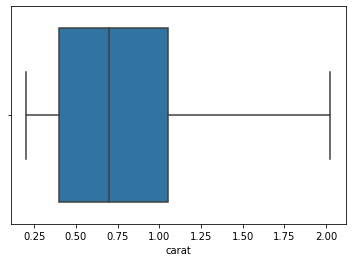

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


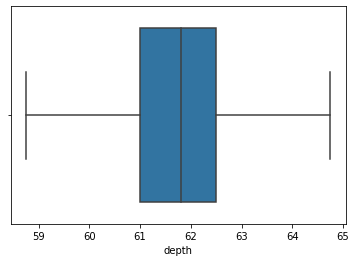

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


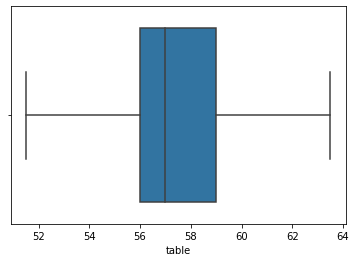

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


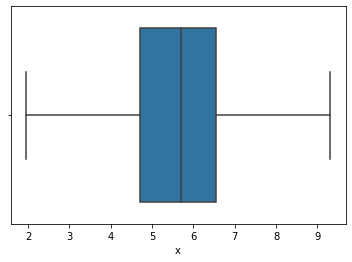

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


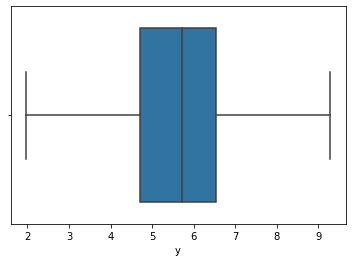

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


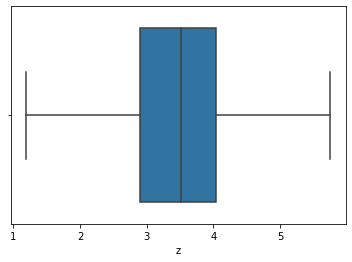

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


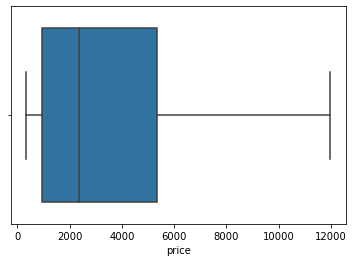

In [23]:
cols = ['carat', 'depth', 'table', 'x', 'y', 'z',
       'price']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show()

In [27]:
df.skew()

carat    0.917096
depth   -0.227276
table    0.480441
x        0.394470
y        0.390750
z        0.384198
price    1.158126
dtype: float64

In [ ]:
# outliers are treated

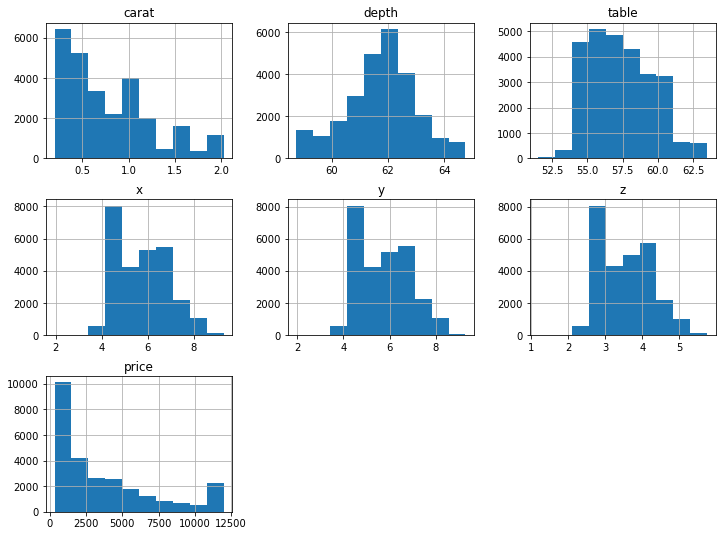

In [25]:
#Univariate Analysis
df.hist(figsize=(12,9))
plt.show()

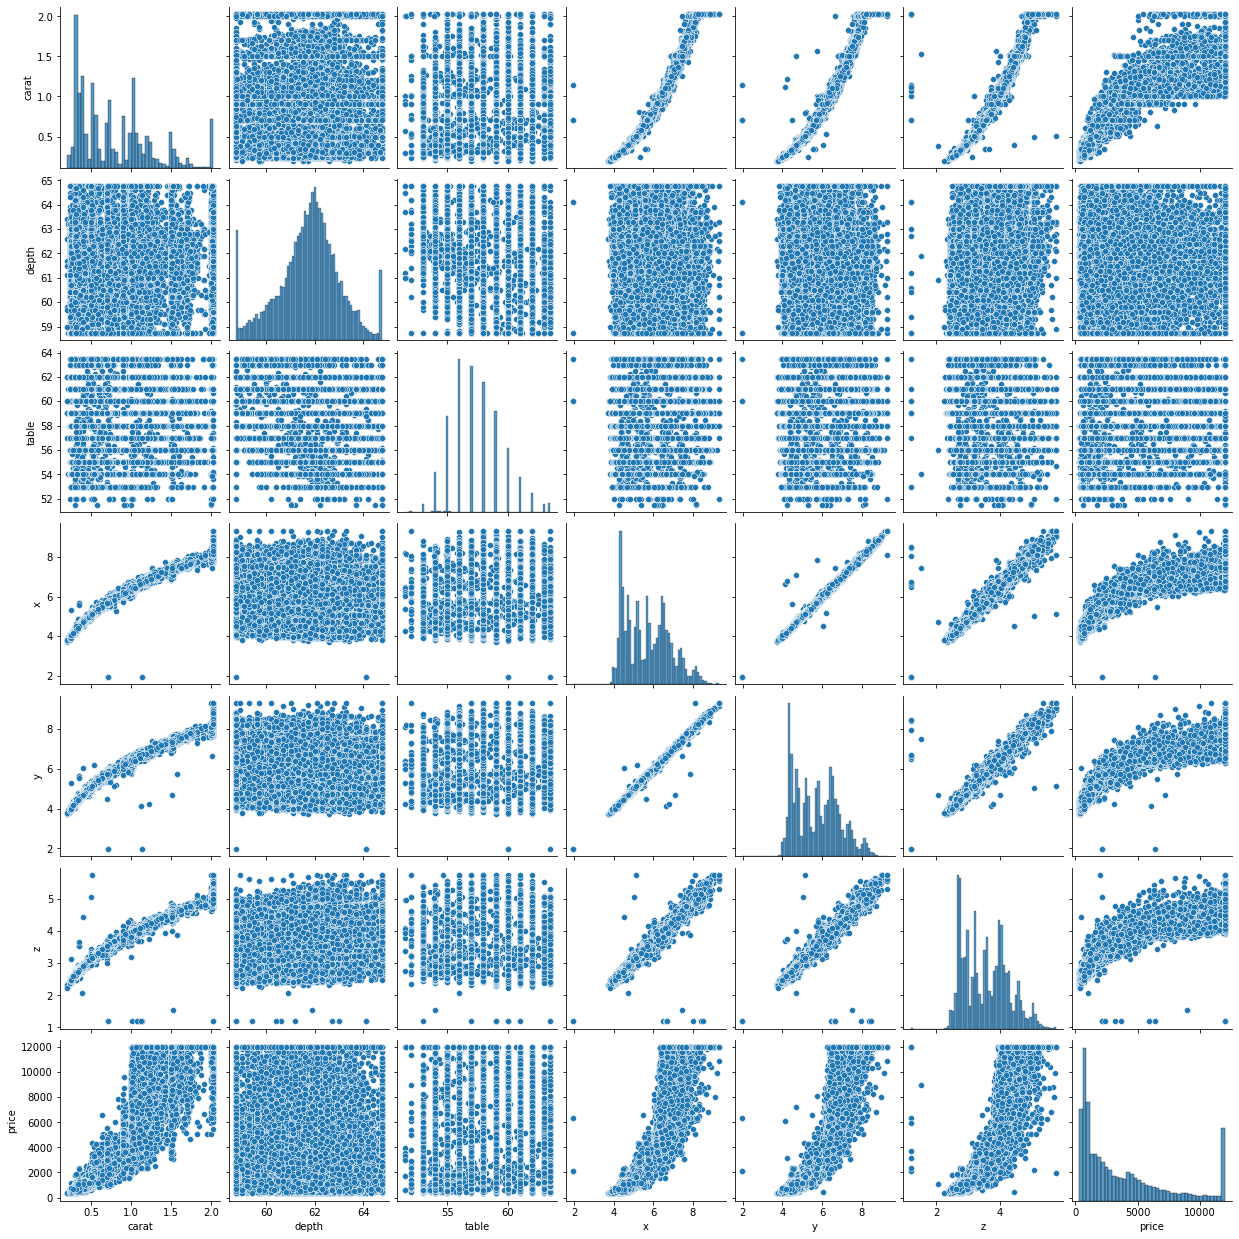

In [26]:
# Bivariate Analysis
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

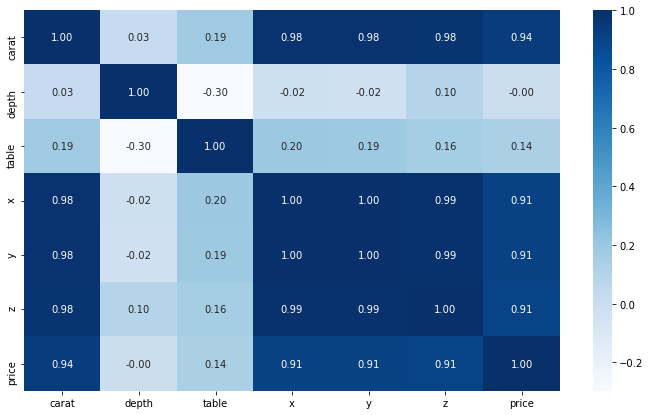

In [29]:
# Correlation Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot= True, fmt= '.2f', cmap='Blues')
plt.show

In [30]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029041,0.187395,0.982207,0.981285,0.977328,0.936741
depth,0.029041,1.000000,-0.296747,-0.021458,-0.024528,0.095901,-0.001197
table,0.187395,-0.296747,1.000000,0.199146,0.193530,0.159425,0.137971
x,0.982207,-0.021458,0.199146,1.000000,0.998495,0.988179,0.912759
y,0.981285,-0.024528,0.193530,0.998495,1.000000,0.987853,0.914191
z,0.977328,0.095901,0.159425,0.988179,0.987853,1.000000,0.905737
price,0.936741,-0.001197,0.137971,0.912759,0.914191,0.905737,1.000000


In [ ]:
# lets analyze categorical variables

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


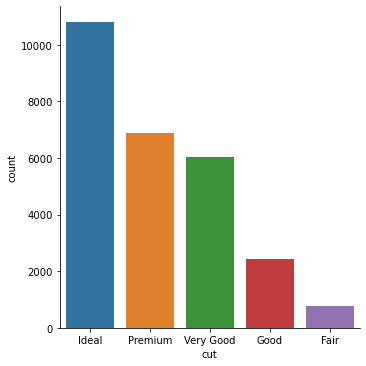

In [34]:
sns.catplot('cut',data=df,kind='count')

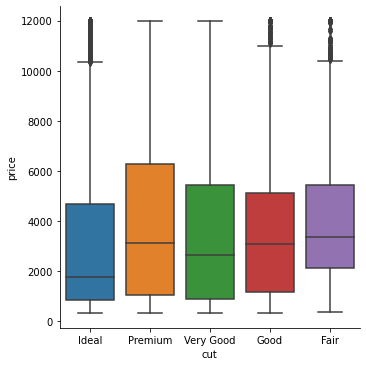

In [35]:
sns.catplot(x='cut',y='price',kind='box',data=df)

In [ ]:
#Premium is the most expensive 

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


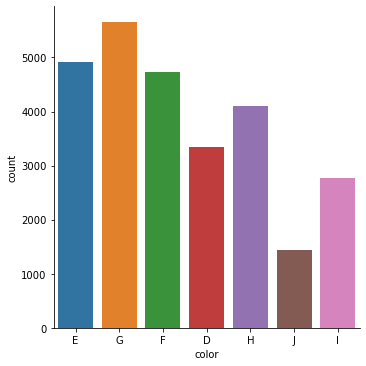

In [36]:
sns.catplot('color',kind='count',data=df)

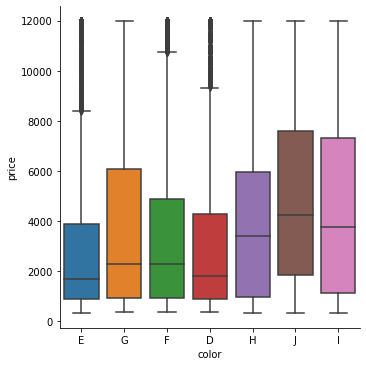

In [37]:
sns.catplot(x='color',y='price',kind='box',data=df)

C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


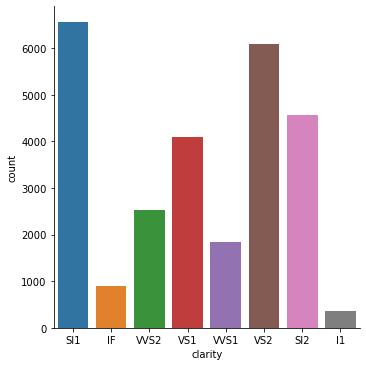

In [38]:
sns.catplot('clarity',kind='count',data=df)

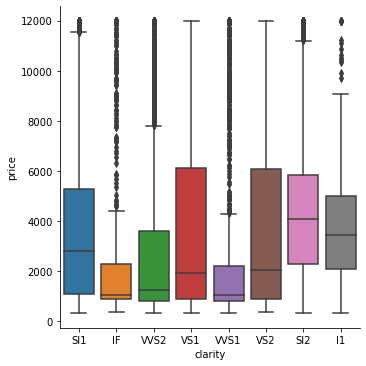

In [39]:
sns.catplot(x='clarity',y='price',kind='box',data=df)

In [40]:
Observation
1.VS1 and VS2 is the most expensive 
2.Price is highly corelated with carat, depth has the least corelation
3.Premium are the most expensive followed by very good cut
4.target variable is price



1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [44]:
# Check missing values
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [45]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [46]:
# Impute missing values
df= df.fillna(df.median())

In [47]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
# X,y,z has values with zero however it may be default 

In [48]:
# shape of dataset after removing missing values
df.shape

(26967, 10)

In [ ]:
# Scaling will be neccessary, its noticed different scale in variables we can bring in all in same scale for analysis

In [49]:
from sklearn.preprocessing import StandardScaler

In [51]:
std_scale= StandardScaler()
std_scale

StandardScaler()

In [52]:
df['carat'] = std_scale.fit_transform(df[['carat']])
df['depth'] = std_scale.fit_transform(df[['depth']])
df['table'] = std_scale.fit_transform(df[['table']])
df['x']= std_scale.fit_transform(df[['x']])
df['y']= std_scale.fit_transform(df[['y']])
df['z']= std_scale.fit_transform(df[['z']])

In [53]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067407,Ideal,E,SI1,0.284981,0.261603,-1.295386,-1.288528,-1.258146,499.0
1,-1.002532,Premium,G,IF,-0.760363,0.261603,-1.162290,-1.136600,-1.200779,984.0
2,0.230108,Very Good,E,VVS2,0.365392,1.188780,0.275152,0.346935,0.348130,6289.0
3,-0.807904,Ideal,F,VS1,-0.117074,-0.665574,-0.807366,-0.832743,-0.827893,1082.0
4,-1.045782,Ideal,F,VVS1,-1.082007,0.725192,-1.224402,-1.163411,-1.272487,779.0


1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.1+ MB


In [60]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [61]:
df['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [62]:
df['clarity'].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

In [66]:
# convert object types to categorical codes

df['cut']=np.where(df['cut']=='Fair','0',df['cut'])
df['cut']=np.where(df['cut']=='Good','1',df['cut'])
df['cut']=np.where(df['cut']=='Very Good','2',df['cut'])
df['cut']=np.where(df['cut']=='Premium','3',df['cut'])
df['cut']=np.where(df['cut']=='Ideal','4',df['cut'])


In [67]:
df['color']=np.where(df['color']=='J','0',df['color'])
df['color']=np.where(df['color']=='I','1',df['color'])
df['color']=np.where(df['color']=='H','2',df['color'])
df['color']=np.where(df['color']=='G','3',df['color'])
df['color']=np.where(df['color']=='F','4',df['color'])
df['color']=np.where(df['color']=='E','5',df['color'])
df['color']=np.where(df['color']=='D','6',df['color'])


In [81]:
df['clarity']=np.where(df['clarity']=='I1','0',df['clarity'])
df['clarity']=np.where(df['clarity']=='SI2','1',df['clarity'])
df['clarity']=np.where(df['clarity']=='SI1','2',df['clarity'])
df['clarity']=np.where(df['clarity']=='VS2','3',df['clarity'])
df['clarity']=np.where(df['clarity']=='VS1','4',df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS2','5',df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS1','6',df['clarity'])
df['clarity']=np.where(df['clarity']=='IF','7',df['clarity'])

In [82]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067407,4.0,5.0,2,0.284981,0.261603,-1.295386,-1.288528,-1.258146,499.0
1,-1.002532,3.0,3.0,7,-0.760363,0.261603,-1.162290,-1.136600,-1.200779,984.0
2,0.230108,2.0,5.0,5,0.365392,1.188780,0.275152,0.346935,0.348130,6289.0
3,-0.807904,4.0,4.0,4,-0.117074,-0.665574,-0.807366,-0.832743,-0.827893,1082.0
4,-1.045782,4.0,4.0,6,-1.082007,0.725192,-1.224402,-1.163411,-1.272487,779.0


In [84]:
df['cut']=df['cut'].astype('float64')
df['color']=df['color'].astype('float64')
df['clarity']=df['clarity'].astype('float64')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  float64
 2   color    26967 non-null  float64
 3   clarity  26967 non-null  float64
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(10)
memory usage: 2.1 MB


In [86]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067407,4.0,5.0,2.0,0.284981,0.261603,-1.295386,-1.288528,-1.258146,499.0
1,-1.002532,3.0,3.0,7.0,-0.760363,0.261603,-1.162290,-1.136600,-1.200779,984.0
2,0.230108,2.0,5.0,5.0,0.365392,1.188780,0.275152,0.346935,0.348130,6289.0
3,-0.807904,4.0,4.0,4.0,-0.117074,-0.665574,-0.807366,-0.832743,-0.827893,1082.0
4,-1.045782,4.0,4.0,6.0,-1.082007,0.725192,-1.224402,-1.163411,-1.272487,779.0


In [87]:
# split data in train and test
X= df.drop('price', axis=1)

y= df[['price']]

In [96]:
#Split the data into train and test (70:30)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [107]:
regression_model= LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [108]:
# check coefficents of each attributes
for idx, col_name in enumerate(X_train.columns):
    print('The coefficent for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coefficent for carat is 4084.808512677596
The coefficent for cut is 112.7297071440438
The coefficent for color is 273.86412693394436
The coefficent for clarity is 432.64439313983235
The coefficent for depth is -11.287863165800946
The coefficent for table is -32.78327545058853
The coefficent for x is -1678.591161529569
The coefficent for y is 1428.1961046715298
The coefficent for z is -172.26196783381152


In [109]:
# check intercept of the model
intercept = regression_model.intercept_[0]
print('The intercept of the model is {}'.format(intercept))

The intercept of the model is 1168.2327320467202


In [110]:
# R square on training data
regression_model.score(X_train,y_train)

0.9316733701770079

In [111]:
# R square on test data

regression_model.score(X_test,y_test)

0.929784720251587

In [115]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

909.2200214541406

In [117]:
#RMSE on Testing data

predicted_test=regression_model.fit(X_test,y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

913.0398060598521

In [ ]:
# linear Regression using stats model

In [118]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,-0.829530,4.0,1.0,5.0,0.445803,-0.665574,-0.851731,-0.895302,-0.827893,1061.0
9728,1.981754,4.0,0.0,2.0,0.847859,-0.201985,1.641610,1.624919,1.739279,6320.0
1936,-1.002532,1.0,4.0,2.0,0.043748,2.115957,-1.180036,-1.145537,-1.143412,536.0
26220,-0.202397,2.0,2.0,2.0,0.847859,-0.201985,-0.106391,-0.064165,0.003928,2214.0
18445,-0.202397,4.0,6.0,1.0,0.284981,-0.665574,-0.053152,-0.019480,-0.010414,2575.0


In [130]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [133]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price~carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    1168.232732
carat        4084.808513
cut           112.729707
color         273.864127
clarity       432.644393
depth         -11.287863
table         -32.783275
x           -1678.591162
y            1428.196105
z            -172.261968
dtype: float64

In [134]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.858e+04
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:42:19   Log-Likelihood:            -1.5538e+05
No. Observations:               18876   AIC:                         3.108e+05
Df Residuals:                   18866   BIC:                         3.109e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1168.2327     29.618     39.444      0.0

In [137]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)


In [138]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

909.2200214541401

In [139]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

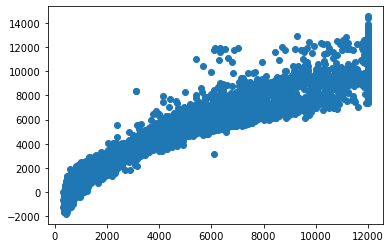

In [140]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [142]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1168.23) * Intercept + (4084.81) * carat + (112.73) * cut + (273.86) * color + (432.64) * clarity + (-11.29) * depth + (-32.78) * table + (-1678.59) * x + (1428.2) * y + (-172.26) * z + 

The final linear regression equation is 
price = b0 + b1 *carat[T.True] + b2 * cut + b3 * color + b4 * clarity+ b5 * depth + b6 * table + b7 * x + b8 * y + b9 *z+(

price (1168.3)*Intercept+(4084.81)*carat+(112.73)*cut+(273.86)*color+(432.64)*clarity+(-11.29)*depth+(-32.78)*table+(-1678.59)*x+(1428.2)*y+(-172.26)*z

2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.


When carat prices increases by 1 unit, diamond price increases by 4084.81 units, keeping all the predictors constant
When cut increases by 1 unit, diamond price increases by 112.73 units keeping all predictors constant
When color increases by 1 unit, diamond prrice increase by 273.26 units, keeping all predictors constant
When clarity increases  by 1 unit diamond price increases bt 432.64 units keeping all predictors constant
When y increases by 1 unit diamond price increases by 1428.2 units keeping all predictors constant

There are some negative co-efficents values (-11.29) depth, x and z. This implies they are inversely propotional with diamond price


In [ ]:
There is lot of variance in data as we see it in the linear plot, with strong mutlicollinearity. The overall P-value is less than alpha


Linear regression Performance Metrics:

intercept for the model: 1168.2327320467202
R square on training data: 0.9316733701770079
R square on testing data: 0.929784720251587
RMSE on Training data: 909.2200214541406
RMSE on Testing data: 913.0398060598521
    
The scores of train and test seems inline and can be considered as Right Fit model    

In [ ]:
Premium cut and very good cut is the most profitable stones, Clarity with VS1 and VS2 are most expensive.
Features Carat, cut, color,clarity and width are the most important factors for price prediction
